In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation

# 二次元の正規分布をギブスサンプリング
実際はこれにギブスサンプリングを適用する意味はない。
たとえ100次元でも。
正規化定数は既知なので。

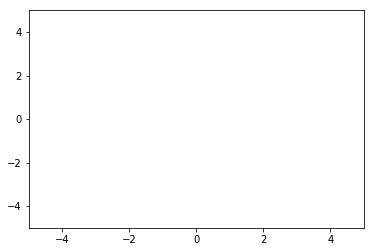

In [9]:
# 相関を表すパラメータ
b = 1/2

# 初期値
x1 = 0
x2 = 0
iterations = 3000
burn_in = 1000
M = 50

samples=[]
ims=[]
fig = plt.figure()

for i in range(iterations):
    for i in range(M):#M-stepごとにサンプリング
        # x2を固定して平均b*x2の一次元正規分布からx１をサンプリング
        x1 = np.random.normal(b*x2,1)
        x2 = np.random.normal(b*x1,1)
    samples.append((x1,x2))
    
samples = np.array(samples[int(burn_in):])   

graph_sample=[]
a = len(samples)
for i in range(a):
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    im = plt.scatter(samples[:i,0], samples[:i,1],c='r')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
plt.show()

In [34]:
x=[]
y=[]
for sample in samples[burn_in:]:
        x.append(sample[0])
        y.append(sample[1])

In [43]:
samples[:5,1]

array([ 0.72979119,  0.23593589,  0.95653044, -1.17741876, -0.67906535])

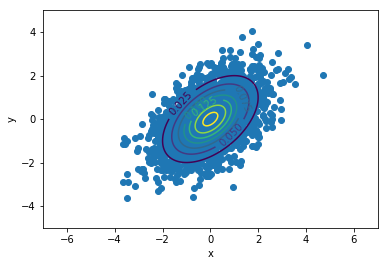

In [13]:
import matplotlib.mlab as mlab
plt.scatter(samples[:,0],samples[:,1])
plt.xlabel('x')
plt.ylabel('y')
x = np.linspace(-7.0,7.0,200)
y = np.linspace(-5.0,5.0,200)
X,Y=np.meshgrid(x,y)
Z = mlab.bivariate_normal(X,Y,1,1,0,0,b)
CS = plt.contour(X,Y,Z)
plt.clabel(CS,inline=1,fontsize=10)
plt.show()

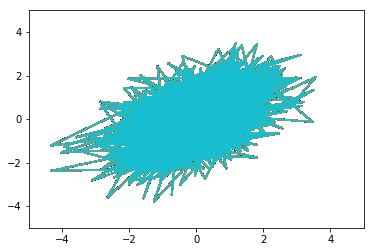

In [5]:
for i in range(len(samples)):
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    im = plt.plot(samples[:i,0], samples[:i,1])
    ims.append(im)

In [6]:
ani = animation.ArtistAnimation(fig, ims)

In [7]:
plt.show()

In [10]:
ani.save("hoge.gif")

/Users/zukako/.pyenv/versions/anaconda3-4.0.0/envs/py35/lib/python3.5/site-packages/matplotlib/animation.py:1021: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)
